<a href="https://colab.research.google.com/github/TusharPandey14/ML01/blob/Code-ipynb-file/Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem :**

In [4]:
#importing libraries
import numpy as np # used for mathematical calculations 
import pandas as pd # creating and storing the data in dataframes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Loading the dataset

In [7]:
data=pd.read_csv('/content/student_info.csv')

In [8]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [9]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [10]:
data.shape

(200, 2)

# Visualizing the Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [12]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


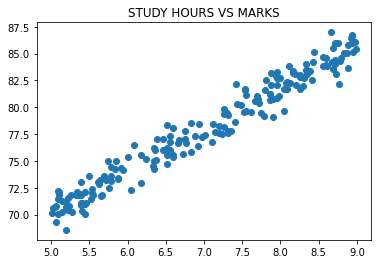

In [13]:
plt.scatter(x=data.study_hours,y=data.student_marks)
# plt.plot(data.student_marks,color='red',label='Marks')
# plt.plot(data.study_hours,color='forestgreen',label='Study Hours')
plt.xlabel=("Student Study Hours")
plt.ylabel=("Student Marks")
plt.title("STUDY HOURS VS MARKS")
#plt.legend()
plt.show()

## Preparing the data for Machine after clearing the null data

In [14]:
# data clearing
# if there is a null value it will return true
data.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [15]:
#total count of null 
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [16]:
#taking mean and putting them in place of the null values
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [17]:
data2=data.fillna(data.mean())

In [18]:
#splitting the dataset 
X=data2.drop("student_marks",axis="columns")
y=data2.drop("study_hours",axis="columns")

In [19]:
#Training 
# X= independent , y=dependent , data used for testing = 20% , randomly value will be taken 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

## Selecting a model and training it 

In [20]:
# linear regression 
# y= m * x + c
from sklearn.linear_model import LinearRegression
lr=LinearRegression() # created an object 


In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([[3.93571802]])

In [23]:
lr.intercept_

array([50.44735504])

In [24]:
m=3.93571802
c=50.44
y=m*4+c
y

66.18287208

In [25]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.19

In [26]:
#testing data of users
y_pred=lr.predict(X_test)

In [27]:
# merging the values of users by the use of numpy
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["Study_hours","Student Marks_original","Student_marks_predicted"])


,Study_hours,Student Marks_original,Student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## Fine Tuning our Model

In [28]:
lr.score(X_train,y_train) #shows accuracy of our Model

0.9589875741425085

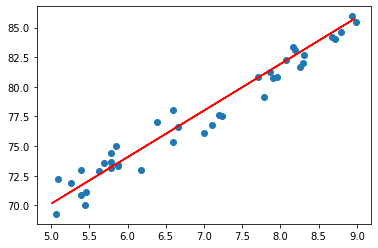

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

SAVING MODEL 


In [30]:
import joblib
joblib.dump(lr,"Marks_predictor.pkl")

['Marks_predictor.pkl']

In [31]:
Project=joblib.load("Marks_predictor.pkl")

In [41]:
Project.predict([[12.09]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


98.03018585822066